In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime

import pylab

In [18]:
df1 = pd.read_csv('../data/solar_oh.csv', index_col=0, parse_dates=['timestamp'])

In [19]:
df1.head()

,fiftyhertz,tennet,amprion,transnetbw,nrv
timestamp,,,,,
2019-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0
2019-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0
2019-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0
2019-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0
2019-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0


In [76]:
df2 = pd.read_csv('../data/EQ_epex_da_price_2.csv', index_col=0, parse_dates=['timestamp'])

In [77]:
df2

,price
timestamp,
2019-01-01 00:00:00,29.730
2019-01-01 01:00:00,26.050
2019-01-01 02:00:00,23.760
2019-01-01 03:00:00,20.950
2019-01-01 04:00:00,15.770
...,...
2021-04-30 19:00:00,56.870
2021-04-30 20:00:00,54.190
2021-04-30 21:00:00,50.355


In [46]:
df3 = pd.read_csv('../data/df_epex_es.csv')#, index_col=0, parse_dates=['Unnamed: 0'])

In [47]:
df3.rename(columns={'Unnamed: 0' : 'timestamp'}, inplace=True)

In [48]:
df3['timestamp'] = pd.to_datetime(df3['timestamp'])

In [49]:
df3 = df3.set_index('timestamp')

In [50]:
df5 = pd.read_csv('../data/imb_power_act_fc.csv', index_col=0, parse_dates=['timestamp'])

In [51]:
df5.head()

,imbalance_price,power_act,power_fc
timestamp,,,
2019-01-01 00:00:00,-329.6045,NaN,NaN
2019-01-01 01:00:00,-283.8000,NaN,NaN
2019-01-01 02:00:00,-334.7170,NaN,NaN
2019-01-01 03:00:00,117.6665,NaN,NaN
2019-01-01 04:00:00,-323.3150,NaN,NaN


In [52]:
df4 = pd.read_csv('../data/wind_offon_merge.csv',  index_col=0, parse_dates=['dt_start_utc'])

In [53]:
df4

,windspeed_ms,fiftyhertz_OFFSHORE,tennet_OFFSHORE,nrv_OFFSHORE,fiftyhertz_ONSHORE,tennet_ONSHORE,amprion_ONSHORE,transnetbw_ONSHORE,nrv_ONSHORE
dt_start_utc,,,,,,,,,
2019-01-01 00:00:00,13.7925,1014.99,4669.35,5684.34,9231.31,11624.89,3039.50,105.45,24001.15
2019-01-01 01:00:00,14.3600,659.54,4674.65,5334.19,10012.16,12762.32,3576.50,112.04,26463.02
2019-01-01 02:00:00,15.0180,615.41,4663.13,5278.54,10852.08,13988.91,4094.75,164.29,29100.03
2019-01-01 03:00:00,14.8220,493.95,4666.95,5160.90,11761.89,14809.73,4685.25,226.52,31483.39
2019-01-01 04:00:00,14.5930,333.78,4668.18,5001.96,13125.93,15131.73,5024.50,315.82,33597.98
...,...,...,...,...,...,...,...,...,...
2020-09-30 19:00:00,6.1635,128.69,4628.28,4756.97,651.60,3648.29,1620.00,179.00,6098.89
2020-09-30 20:00:00,5.9385,140.73,5055.73,5196.46,707.77,3953.82,1977.75,259.00,6898.34
2020-09-30 21:00:00,6.0630,174.31,5165.00,5339.31,779.20,3957.25,2123.75,284.25,7144.45


In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20424 entries, 2019-01-01 00:00:00 to 2021-04-30 23:00:00
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fiftyhertz  20424 non-null  float64
 1   tennet      20424 non-null  float64
 2   amprion     20424 non-null  float64
 3   transnetbw  20424 non-null  float64
 4   nrv         20424 non-null  float64
dtypes: float64(5)
memory usage: 957.4 KB


In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20401 entries, 2019-01-01 00:00:00 to 2021-04-30 00:00:00
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  20401 non-null  int64  
 1   price       20401 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 478.1 KB


In [58]:
df2.drop(['Unnamed: 0'], axis=1, inplace=True)

In [65]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 20424 entries, 29.73 to 43.79
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  20424 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 319.1 KB


In [66]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20424 entries, 2019-01-01 00:00:00 to 2021-04-30 23:00:00
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   imbalance_price     20424 non-null  float64
 1   epex_da_de_eur_mwh  20424 non-null  float64
 2   load_50H            20424 non-null  float64
 3   load_DE             20424 non-null  float64
 4   load_DK             20424 non-null  float64
 5   load_DK1            20424 non-null  float64
 6   load_TTG            20424 non-null  float64
 7   solar_50H           20424 non-null  float64
 8   solar_DE            20424 non-null  float64
 9   solar_DK            20424 non-null  float64
 10  solar_DK1           20424 non-null  float64
 11  solar_TTG           20424 non-null  float64
 12  offshore_50H        14138 non-null  float64
 13  offshore_DE         20424 non-null  float64
 14  offshore_DK         20424 non-null  float64
 15  offshore_DK1      

In [67]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15336 entries, 2019-01-01 00:00:00 to 2020-09-30 23:00:00
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   windspeed_ms         15336 non-null  float64
 1   fiftyhertz_OFFSHORE  15336 non-null  float64
 2   tennet_OFFSHORE      15336 non-null  float64
 3   nrv_OFFSHORE         15336 non-null  float64
 4   fiftyhertz_ONSHORE   15336 non-null  float64
 5   tennet_ONSHORE       15336 non-null  float64
 6   amprion_ONSHORE      15336 non-null  float64
 7   transnetbw_ONSHORE   15336 non-null  float64
 8   nrv_ONSHORE          15336 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [68]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20424 entries, 2019-01-01 00:00:00 to 2021-04-30 23:00:00
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   imbalance_price  20424 non-null  float64
 1   power_act        16082 non-null  float64
 2   power_fc         16505 non-null  float64
dtypes: float64(3)
memory usage: 638.2 KB


In [69]:
df3.columns

Index(['imbalance_price', 'epex_da_de_eur_mwh', 'load_50H', 'load_DE',
       'load_DK', 'load_DK1', 'load_TTG', 'solar_50H', 'solar_DE', 'solar_DK',
       'solar_DK1', 'solar_TTG', 'offshore_50H', 'offshore_DE', 'offshore_DK',
       'offshore_DK1', 'offshore_TTG', 'onshore_50H', 'onshore_DE',
       'onshore_DK', 'onshore_DK1', 'onshore_TTG'],
      dtype='object')

In [70]:
df4[['imbalance_price', 'epex_da_de_eur_mwh', 'load_50H', 'load_DE',
       'load_DK', 'load_DK1', 'load_TTG', 'solar_50H', 'solar_DE', 'solar_DK',
       'solar_DK1', 'solar_TTG', 'offshore_50H', 'offshore_DE', 'offshore_DK',
       'offshore_DK1', 'offshore_TTG', 'onshore_50H', 'onshore_DE',
       'onshore_DK', 'onshore_DK1', 'onshore_TTG']] = df3[['imbalance_price', 'epex_da_de_eur_mwh', 'load_50H', 'load_DE',
       'load_DK', 'load_DK1', 'load_TTG', 'solar_50H', 'solar_DE', 'solar_DK',
       'solar_DK1', 'solar_TTG', 'offshore_50H', 'offshore_DE', 'offshore_DK',
       'offshore_DK1', 'offshore_TTG', 'onshore_50H', 'onshore_DE',
       'onshore_DK', 'onshore_DK1', 'onshore_TTG']]

In [72]:
df4

,windspeed_ms,fiftyhertz_OFFSHORE,tennet_OFFSHORE,nrv_OFFSHORE,fiftyhertz_ONSHORE,tennet_ONSHORE,amprion_ONSHORE,transnetbw_ONSHORE,nrv_ONSHORE,imbalance_price,...,offshore_50H,offshore_DE,offshore_DK,offshore_DK1,offshore_TTG,onshore_50H,onshore_DE,onshore_DK,onshore_DK1,onshore_TTG
dt_start_utc,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,13.7925,1014.99,4669.35,5684.34,9231.31,11624.89,3039.50,105.45,24001.15,-329.6045,...,NaN,5021.0,955.0,627.0,3984.0,8445.5,20618.5,2987.0,2342.0,NaN
2019-01-01 01:00:00,14.3600,659.54,4674.65,5334.19,10012.16,12762.32,3576.50,112.04,26463.02,-283.8000,...,NaN,5028.0,512.0,254.0,3990.0,9193.5,22352.0,2817.0,2227.0,NaN
2019-01-01 02:00:00,15.0180,615.41,4663.13,5278.54,10852.08,13988.91,4094.75,164.29,29100.03,-334.7170,...,NaN,4978.0,443.0,233.0,3938.5,9883.0,24035.0,2729.0,2163.0,NaN
2019-01-01 03:00:00,14.8220,493.95,4666.95,5160.90,11761.89,14809.73,4685.25,226.52,31483.39,117.6665,...,NaN,4908.0,437.0,233.0,3868.0,10500.0,25475.0,2667.0,2108.0,NaN
2019-01-01 04:00:00,14.5930,333.78,4668.18,5001.96,13125.93,15131.73,5024.50,315.82,33597.98,-323.3150,...,NaN,4884.0,437.0,233.0,3844.0,11154.5,26538.5,2699.0,2142.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30 19:00:00,6.1635,128.69,4628.28,4756.97,651.60,3648.29,1620.00,179.00,6098.89,-130.1485,...,118.5,3545.5,773.0,722.0,3427.0,627.0,6282.0,737.5,631.0,3475.0
2020-09-30 20:00:00,5.9385,140.73,5055.73,5196.46,707.77,3953.82,1977.75,259.00,6898.34,-248.8910,...,133.0,3931.0,775.5,699.0,3798.0,784.0,7379.0,826.5,701.0,4013.0
2020-09-30 21:00:00,6.0630,174.31,5165.00,5339.31,779.20,3957.25,2123.75,284.25,7144.45,157.6065,...,140.0,4156.5,791.0,695.0,4016.5,897.5,8190.0,899.0,765.0,4451.5


In [73]:
df1.columns

Index(['fiftyhertz', 'tennet', 'amprion', 'transnetbw', 'nrv'], dtype='object')

In [80]:
df4[['solar_mw_fiftyhertz', 'solar_mw_tennet', 'solar_mw_amprion', 'solar_mw_transnetbw', 'solar_mw_nrv']] = df1[['fiftyhertz', 'tennet', 'amprion', 'transnetbw', 'nrv']]

In [78]:
df2.columns

Index(['price'], dtype='object')

In [81]:
df4['da_prognosis'] = df2['price']

In [82]:
df5.columns

Index(['imbalance_price', 'power_act', 'power_fc'], dtype='object')

In [83]:
df4[['power_act', 'power_fc','imbalance_price']] = df5[['power_act', 'power_fc','imbalance_price']]

In [86]:
df4.isnull().sum().sort_values(ascending=False).head(4).index

Index(['onshore_TTG', 'offshore_50H', 'power_act', 'power_fc'], dtype='object')

In [87]:
df4.drop(['onshore_TTG', 'offshore_50H', 'power_act', 'power_fc'], axis=1, inplace=True)

In [89]:
df4.columns

Index(['windspeed_ms', 'fiftyhertz_OFFSHORE', 'tennet_OFFSHORE',
       'nrv_OFFSHORE', 'fiftyhertz_ONSHORE', 'tennet_ONSHORE',
       'amprion_ONSHORE', 'transnetbw_ONSHORE', 'nrv_ONSHORE',
       'imbalance_price', 'epex_da_de_eur_mwh', 'load_50H', 'load_DE',
       'load_DK', 'load_DK1', 'load_TTG', 'solar_50H', 'solar_DE', 'solar_DK',
       'solar_DK1', 'solar_TTG', 'offshore_DE', 'offshore_DK', 'offshore_DK1',
       'offshore_TTG', 'onshore_50H', 'onshore_DE', 'onshore_DK',
       'onshore_DK1', 'solar_mw_fiftyhertz', 'solar_mw_tennet',
       'solar_mw_amprion', 'solar_mw_transnetbw', 'solar_mw_nrv',
       'da_prognosis'],
      dtype='object')

In [ ]:
['fc_load_50H', 'fc_load_DE',
       'fc_load_DK', 'fc_load_DK1', 'fc_load_TTG', 'fc_solar_50H', 'fc_solar_DE', 'fc_solar_DK',
       'fc_solar_DK1', 'fc_solar_TTG', 'fc_offshore_DE', 'fc_offshore_DK', 'fc_offshore_DK1',
       'fc_offshore_TTG', 'fc_onshore_50H', 'fc_onshore_DE', 'fc_onshore_DK',
       'fc_onshore_DK1']

In [90]:
df4[['fc_load_50H', 'fc_load_DE',
       'fc_load_DK', 'fc_load_DK1', 'fc_load_TTG', 'fc_solar_50H', 'fc_solar_DE', 'fc_solar_DK',
       'fc_solar_DK1', 'fc_solar_TTG', 'fc_offshore_DE', 'fc_offshore_DK', 'fc_offshore_DK1',
       'fc_offshore_TTG', 'fc_onshore_50H', 'fc_onshore_DE', 'fc_onshore_DK',
       'fc_onshore_DK1']]= df4[['load_50H', 'load_DE',
       'load_DK', 'load_DK1', 'load_TTG', 'solar_50H', 'solar_DE', 'solar_DK',
       'solar_DK1', 'solar_TTG', 'offshore_DE', 'offshore_DK', 'offshore_DK1',
       'offshore_TTG', 'onshore_50H', 'onshore_DE', 'onshore_DK',
       'onshore_DK1']]

In [91]:
df4.drop(['load_50H', 'load_DE',
       'load_DK', 'load_DK1', 'load_TTG', 'solar_50H', 'solar_DE', 'solar_DK',
       'solar_DK1', 'solar_TTG', 'offshore_DE', 'offshore_DK', 'offshore_DK1',
       'offshore_TTG', 'onshore_50H', 'onshore_DE', 'onshore_DK',
       'onshore_DK1'], axis=1, inplace=True)

In [92]:
df4.columns

Index(['windspeed_ms', 'fiftyhertz_OFFSHORE', 'tennet_OFFSHORE',
       'nrv_OFFSHORE', 'fiftyhertz_ONSHORE', 'tennet_ONSHORE',
       'amprion_ONSHORE', 'transnetbw_ONSHORE', 'nrv_ONSHORE',
       'imbalance_price', 'epex_da_de_eur_mwh', 'solar_mw_fiftyhertz',
       'solar_mw_tennet', 'solar_mw_amprion', 'solar_mw_transnetbw',
       'solar_mw_nrv', 'da_prognosis', 'fc_load_50H', 'fc_load_DE',
       'fc_load_DK', 'fc_load_DK1', 'fc_load_TTG', 'fc_solar_50H',
       'fc_solar_DE', 'fc_solar_DK', 'fc_solar_DK1', 'fc_solar_TTG',
       'fc_offshore_DE', 'fc_offshore_DK', 'fc_offshore_DK1',
       'fc_offshore_TTG', 'fc_onshore_50H', 'fc_onshore_DE', 'fc_onshore_DK',
       'fc_onshore_DK1'],
      dtype='object')

In [93]:
df4[['offshore_mw_fiftyhertz', 'offshore_mw_tennet',
       'offshore_mw_nrv', 'onshore_mw_fiftyhertz', 'onshore_mw_tennet',
       'onshore_mw_amprion', 'onshore_mw_transnetbw', 'onshore_mw_nrv']] = df4[['fiftyhertz_OFFSHORE', 'tennet_OFFSHORE',
       'nrv_OFFSHORE', 'fiftyhertz_ONSHORE', 'tennet_ONSHORE',
       'amprion_ONSHORE', 'transnetbw_ONSHORE', 'nrv_ONSHORE']] 

In [94]:
df4.drop(['fiftyhertz_OFFSHORE', 'tennet_OFFSHORE',
       'nrv_OFFSHORE', 'fiftyhertz_ONSHORE', 'tennet_ONSHORE',
       'amprion_ONSHORE', 'transnetbw_ONSHORE', 'nrv_ONSHORE'], axis=1, inplace=True)

In [95]:
df4.columns

Index(['windspeed_ms', 'imbalance_price', 'epex_da_de_eur_mwh',
       'solar_mw_fiftyhertz', 'solar_mw_tennet', 'solar_mw_amprion',
       'solar_mw_transnetbw', 'solar_mw_nrv', 'da_prognosis', 'fc_load_50H',
       'fc_load_DE', 'fc_load_DK', 'fc_load_DK1', 'fc_load_TTG',
       'fc_solar_50H', 'fc_solar_DE', 'fc_solar_DK', 'fc_solar_DK1',
       'fc_solar_TTG', 'fc_offshore_DE', 'fc_offshore_DK', 'fc_offshore_DK1',
       'fc_offshore_TTG', 'fc_onshore_50H', 'fc_onshore_DE', 'fc_onshore_DK',
       'fc_onshore_DK1', 'offshore_mw_fiftyhertz', 'offshore_mw_tennet',
       'offshore_mw_nrv', 'onshore_mw_fiftyhertz', 'onshore_mw_tennet',
       'onshore_mw_amprion', 'onshore_mw_transnetbw', 'onshore_mw_nrv'],
      dtype='object')

In [97]:
df4.rename(columns = {'da_prognosis' : 'fc_da'}, inplace=True)

In [99]:
df4['imbalance_price_target'] = df4['imbalance_price'] 

In [101]:
df4.drop('imbalance_price', axis=1, inplace=True)

In [102]:
df4.columns

Index(['windspeed_ms', 'epex_da_de_eur_mwh', 'solar_mw_fiftyhertz',
       'solar_mw_tennet', 'solar_mw_amprion', 'solar_mw_transnetbw',
       'solar_mw_nrv', 'fc_da', 'fc_load_50H', 'fc_load_DE', 'fc_load_DK',
       'fc_load_DK1', 'fc_load_TTG', 'fc_solar_50H', 'fc_solar_DE',
       'fc_solar_DK', 'fc_solar_DK1', 'fc_solar_TTG', 'fc_offshore_DE',
       'fc_offshore_DK', 'fc_offshore_DK1', 'fc_offshore_TTG',
       'fc_onshore_50H', 'fc_onshore_DE', 'fc_onshore_DK', 'fc_onshore_DK1',
       'offshore_mw_fiftyhertz', 'offshore_mw_tennet', 'offshore_mw_nrv',
       'onshore_mw_fiftyhertz', 'onshore_mw_tennet', 'onshore_mw_amprion',
       'onshore_mw_transnetbw', 'onshore_mw_nrv', 'imbalance_price_target'],
      dtype='object')

In [103]:
df4.isnull().sum().sort_values(ascending=False)

windspeed_ms              0
offshore_mw_fiftyhertz    0
fc_offshore_DK1           0
fc_offshore_TTG           0
fc_onshore_50H            0
fc_onshore_DE             0
fc_onshore_DK             0
fc_onshore_DK1            0
offshore_mw_tennet        0
fc_offshore_DE            0
offshore_mw_nrv           0
onshore_mw_fiftyhertz     0
onshore_mw_tennet         0
onshore_mw_amprion        0
onshore_mw_transnetbw     0
onshore_mw_nrv            0
fc_offshore_DK            0
fc_solar_TTG              0
epex_da_de_eur_mwh        0
fc_load_50H               0
solar_mw_fiftyhertz       0
solar_mw_tennet           0
solar_mw_amprion          0
solar_mw_transnetbw       0
solar_mw_nrv              0
fc_da                     0
fc_load_DE                0
fc_solar_DK1              0
fc_load_DK                0
fc_load_DK1               0
fc_load_TTG               0
fc_solar_50H              0
fc_solar_DE               0
fc_solar_DK               0
imbalance_price_target    0
dtype: int64

In [104]:
df4.corr()

,windspeed_ms,epex_da_de_eur_mwh,solar_mw_fiftyhertz,solar_mw_tennet,solar_mw_amprion,solar_mw_transnetbw,solar_mw_nrv,fc_da,fc_load_50H,fc_load_DE,...,fc_onshore_DK1,offshore_mw_fiftyhertz,offshore_mw_tennet,offshore_mw_nrv,onshore_mw_fiftyhertz,onshore_mw_tennet,onshore_mw_amprion,onshore_mw_transnetbw,onshore_mw_nrv,imbalance_price_target
dt_start_utc,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,13.7925,10.07,0.0,0.00,0.0,0.0,0.00,29.730,6150.5,41218.5,...,2342.0,1014.99,4669.35,5684.34,9231.31,11624.89,3039.50,105.45,24001.15,-329.6045
2019-01-01 01:00:00,14.3600,-4.08,0.0,0.00,0.0,0.0,0.00,26.050,6029.0,40139.0,...,2227.0,659.54,4674.65,5334.19,10012.16,12762.32,3576.50,112.04,26463.02,-283.8000
2019-01-01 02:00:00,15.0180,-9.91,0.0,0.00,0.0,0.0,0.00,23.760,6057.0,39917.0,...,2163.0,615.41,4663.13,5278.54,10852.08,13988.91,4094.75,164.29,29100.03,-334.7170
2019-01-01 03:00:00,14.8220,-7.41,0.0,0.00,0.0,0.0,0.00,20.950,6122.5,40282.0,...,2108.0,493.95,4666.95,5160.90,11761.89,14809.73,4685.25,226.52,31483.39,117.6665
2019-01-01 04:00:00,14.5930,-12.55,0.0,0.00,0.0,0.0,0.00,15.770,6152.0,40528.0,...,2142.0,333.78,4668.18,5001.96,13125.93,15131.73,5024.50,315.82,33597.98,-323.3150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30 19:00:00,6.1635,49.92,0.0,0.03,0.0,0.0,0.03,53.555,11108.5,56709.0,...,631.0,128.69,4628.28,4756.97,651.60,3648.29,1620.00,179.00,6098.89,-130.1485
2020-09-30 20:00:00,5.9385,42.79,0.0,0.05,0.0,0.0,0.05,46.200,10454.5,53241.0,...,701.0,140.73,5055.73,5196.46,707.77,3953.82,1977.75,259.00,6898.34,-248.8910
2020-09-30 21:00:00,6.0630,35.02,0.0,0.05,0.0,0.0,0.05,40.030,9635.5,49149.0,...,765.0,174.31,5165.00,5339.31,779.20,3957.25,2123.75,284.25,7144.45,157.6065


In [ ]:
df4.to_csv('dataset_merged.csv')

<AxesSubplot:>

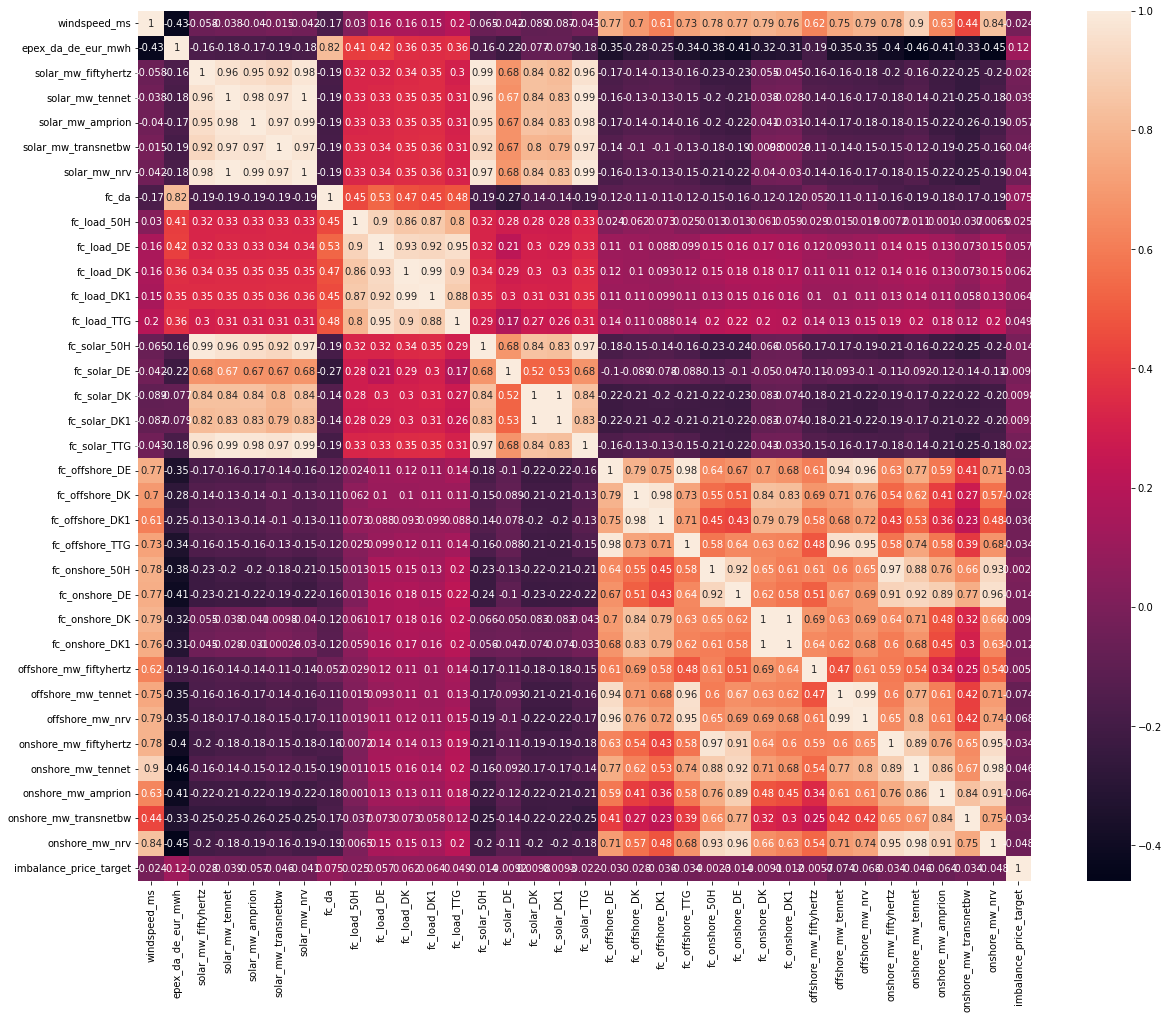

In [106]:
plt.figure(figsize=(20,16))
sns.heatmap(df4.corr(), annot=True)

In [111]:
abs(df4.corr()['imbalance_price_target']).sort_values(ascending=False)

imbalance_price_target    1.000000
epex_da_de_eur_mwh        0.115312
fc_da                     0.075265
offshore_mw_tennet        0.074058
offshore_mw_nrv           0.067879
onshore_mw_amprion        0.063969
fc_load_DK1               0.063748
fc_load_DK                0.062461
solar_mw_amprion          0.057294
fc_load_DE                0.056535
fc_load_TTG               0.049124
onshore_mw_nrv            0.047951
solar_mw_transnetbw       0.046073
onshore_mw_tennet         0.045993
solar_mw_nrv              0.041492
solar_mw_tennet           0.038540
fc_offshore_DK1           0.035767
fc_offshore_TTG           0.034378
onshore_mw_fiftyhertz     0.034180
onshore_mw_transnetbw     0.033579
fc_offshore_DE            0.029543
fc_offshore_DK            0.028145
solar_mw_fiftyhertz       0.028134
fc_load_50H               0.024821
windspeed_ms              0.024205
fc_solar_TTG              0.021746
fc_onshore_DE             0.013658
fc_solar_50H              0.013595
fc_onshore_DK1      